## ***To predict Happiness score given the values of other parameters using Multiple Regression***

In [22]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
# this allows plots to appear directly in the notebook
%matplotlib inline

**Read the data**

World Happiness report 2022

In [56]:
# read data into a DataFrame
data = pd.read_csv('/content/World Happiness Report 2022.csv', index_col=0)
data.columns

Index(['Country', 'Happiness_score', 'Whisker-high', 'Whisker-low',
       'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [24]:
data.head()

,Country,Happiness_score,Whisker-high,Whisker-low,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
RANK,,,,,,,,,,
1,Finland,7.821,7.886,7.756,1.892,1.258,0.775,0.736,0.109,0.534
2,Denmark,7.636,7.710,7.563,1.953,1.243,0.777,0.719,0.188,0.532
3,Iceland,7.557,7.651,7.464,1.936,1.320,0.803,0.718,0.270,0.191
4,Switzerland,7.512,7.586,7.437,2.026,1.226,0.822,0.677,0.147,0.461
5,Netherlands,7.415,7.471,7.359,1.945,1.206,0.787,0.651,0.271,0.419


Dropping the non-numeric column 'Country'

In [25]:
data.drop('Country', inplace=True, axis=1)

In [26]:
data.describe()

,Happiness_score,Whisker-high,Whisker-low,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.553575,5.673589,5.433568,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,1.086843,1.065621,1.109380,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,2.404000,2.469000,2.339000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.888750,5.006250,4.754750,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,5.568500,5.680000,5.453000,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,6.305000,6.448750,6.190000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,7.821000,7.886000,7.756000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


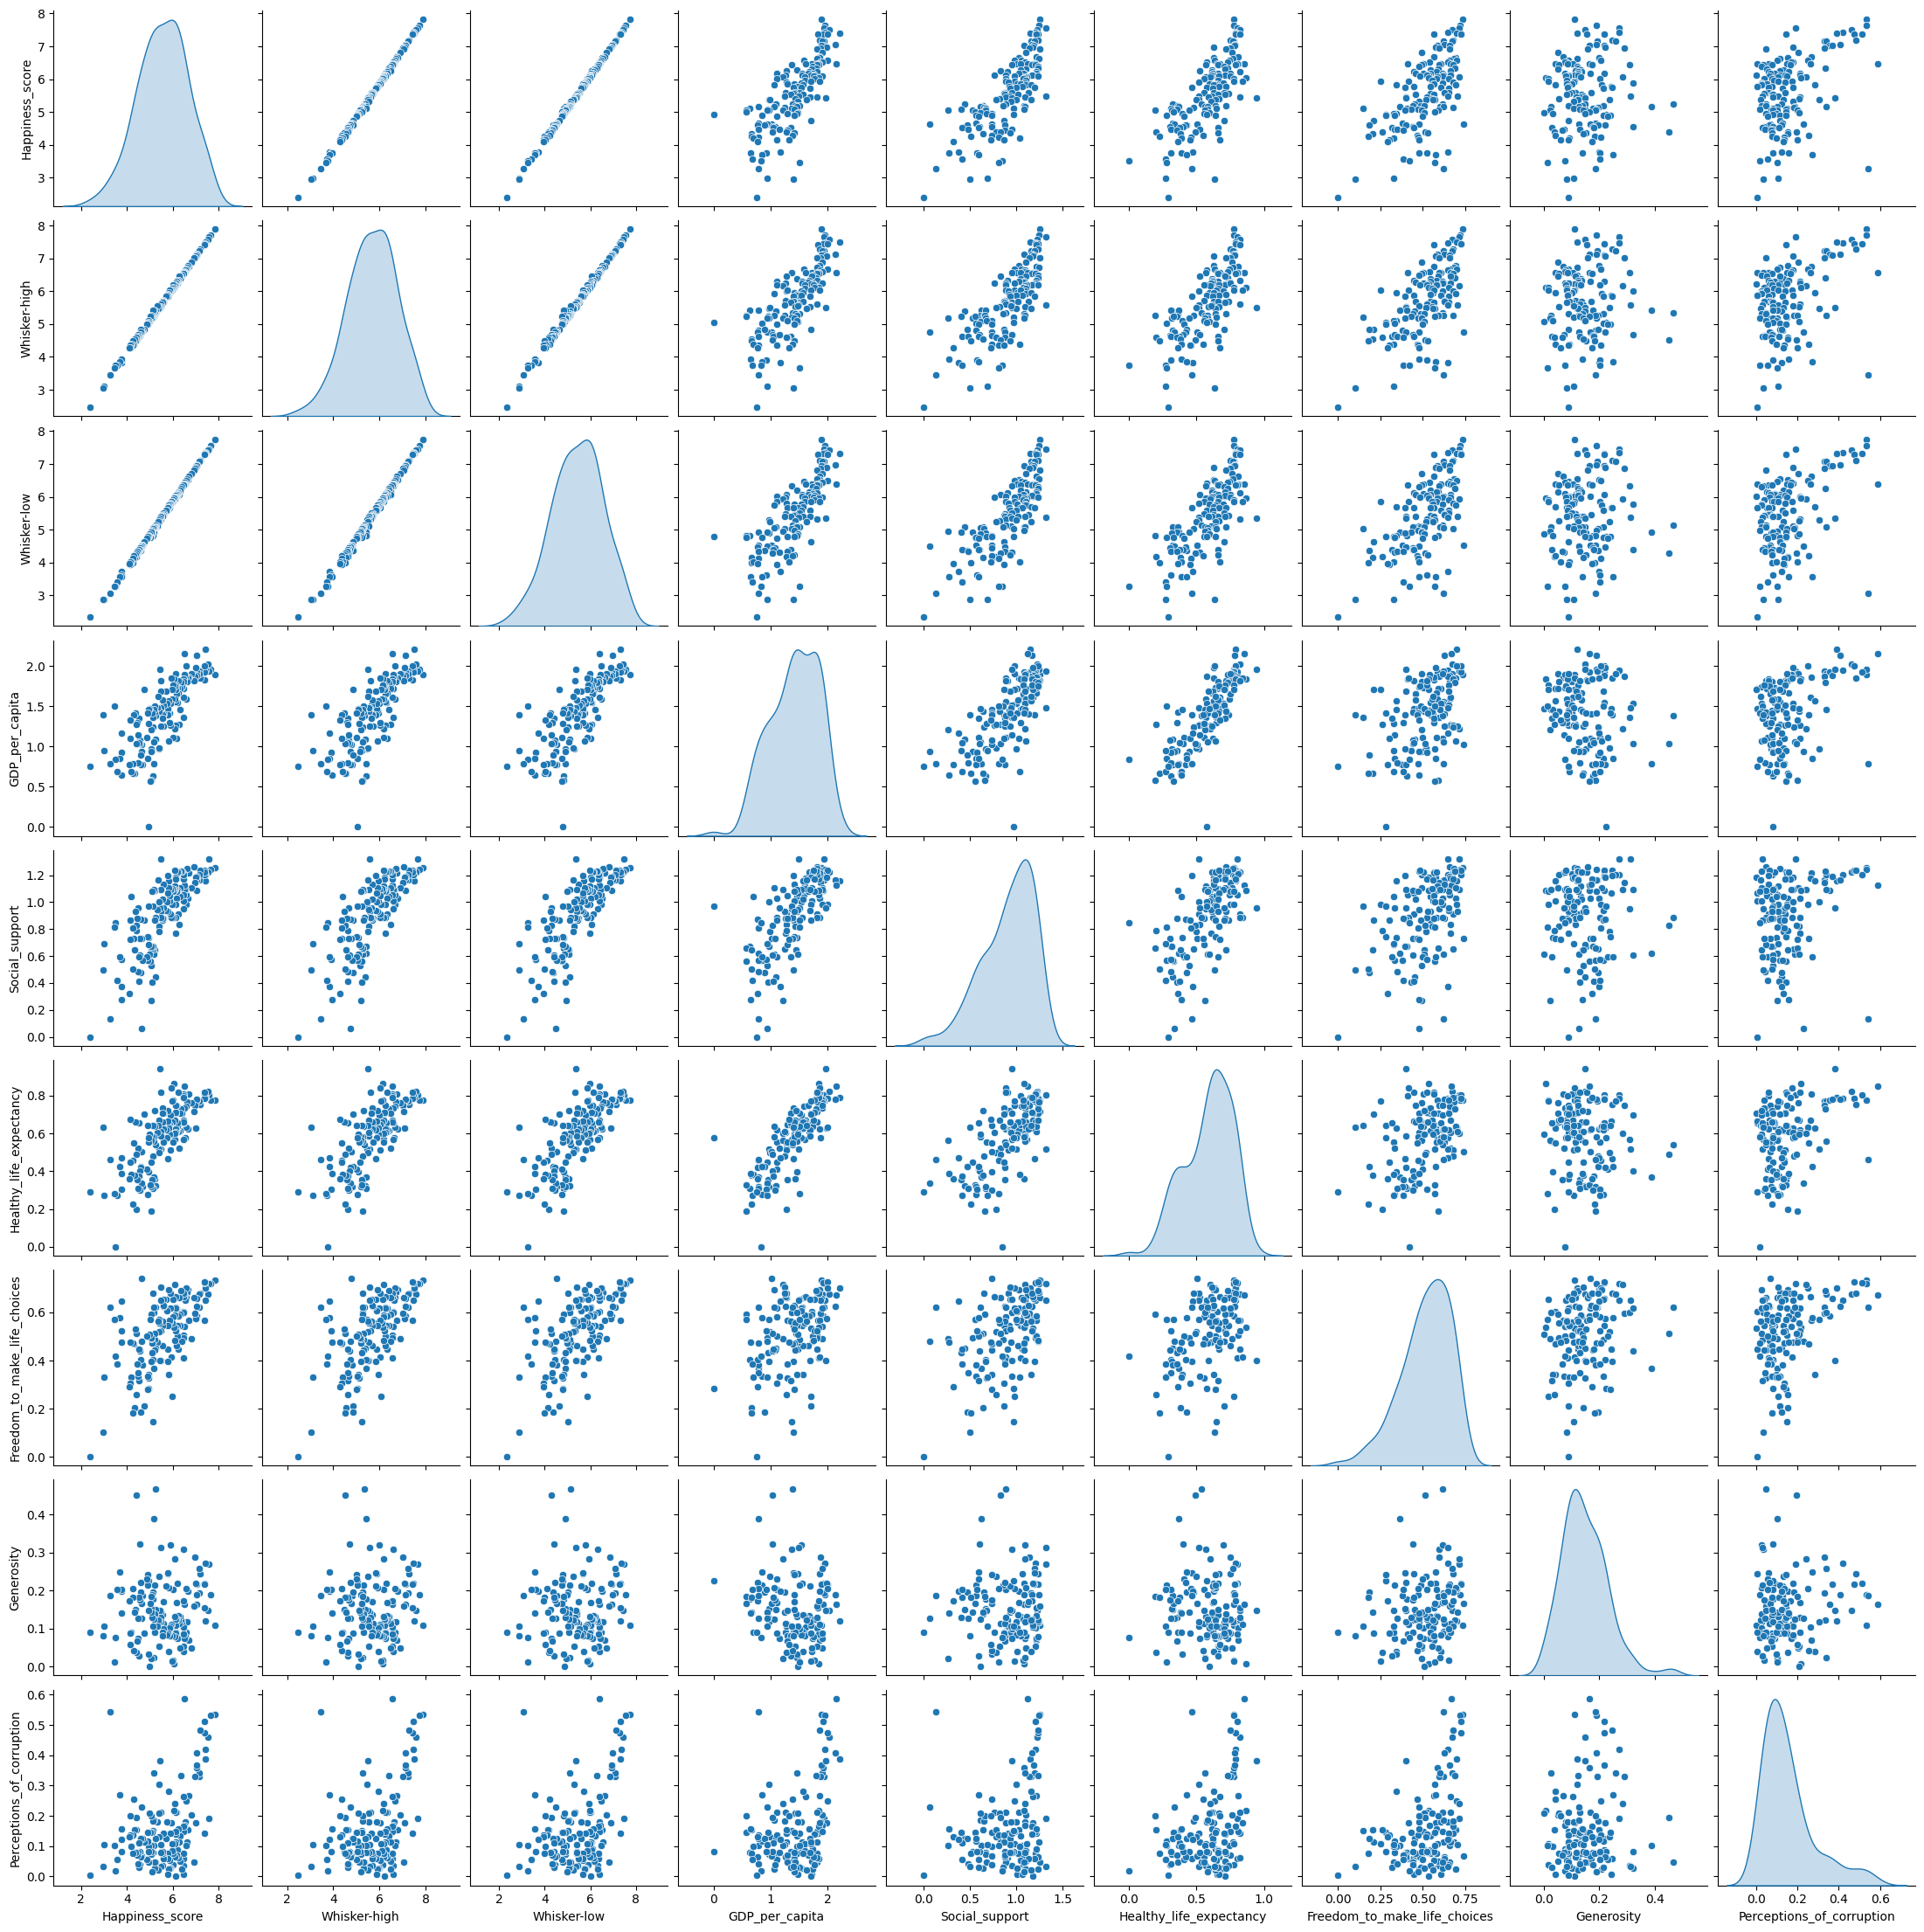

In [27]:
sns.pairplot(data,diag_kind='kde')

**To get the co-relation between the variables**

In [28]:
data.corr()

,Happiness_score,Whisker-high,Whisker-low,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Happiness_score,1.000000,0.999333,0.999383,0.763677,0.777889,0.740260,0.624822,0.063785,0.416216
Whisker-high,0.999333,1.000000,0.997434,0.752104,0.773375,0.727611,0.622934,0.065728,0.413718
Whisker-low,0.999383,0.997434,1.000000,0.773844,0.781302,0.751530,0.625926,0.061820,0.418162
GDP_per_capita,0.763677,0.752104,0.773844,1.000000,0.722421,0.815386,0.458591,-0.164472,0.377589
Social_support,0.777889,0.773375,0.781302,0.722421,1.000000,0.666760,0.480466,-0.002339,0.223352
Healthy_life_expectancy,0.740260,0.727611,0.751530,0.815386,0.666760,1.000000,0.433166,-0.098133,0.362626
Freedom_to_make_life_choices,0.624822,0.622934,0.625926,0.458591,0.480466,0.433166,1.000000,0.176800,0.402474
Generosity,0.063785,0.065728,0.061820,-0.164472,-0.002339,-0.098133,0.176800,1.000000,0.096107
Perceptions_of_corruption,0.416216,0.413718,0.418162,0.377589,0.223352,0.362626,0.402474,0.096107,1.000000


<Axes: >

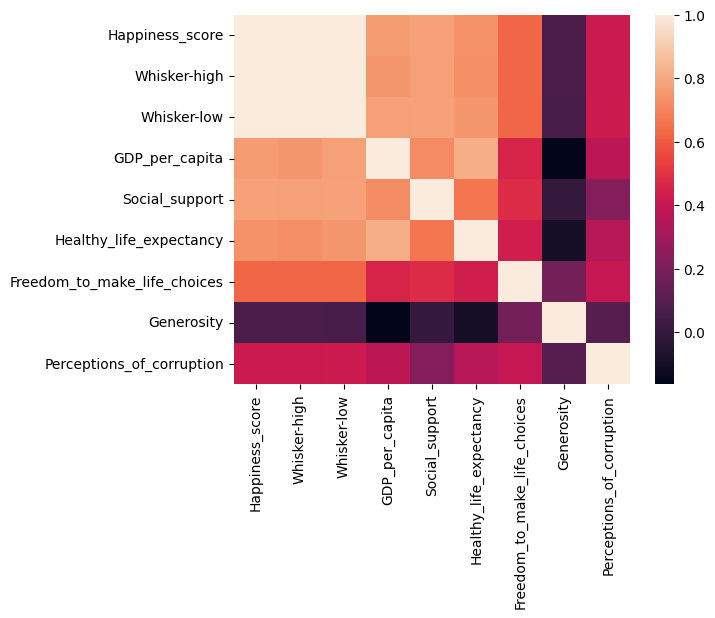

In [29]:
sns.heatmap(data.corr())

In [30]:
data.shape

(146, 9)

<Axes: xlabel='Freedom_to_make_life_choices', ylabel='Happiness_score'>

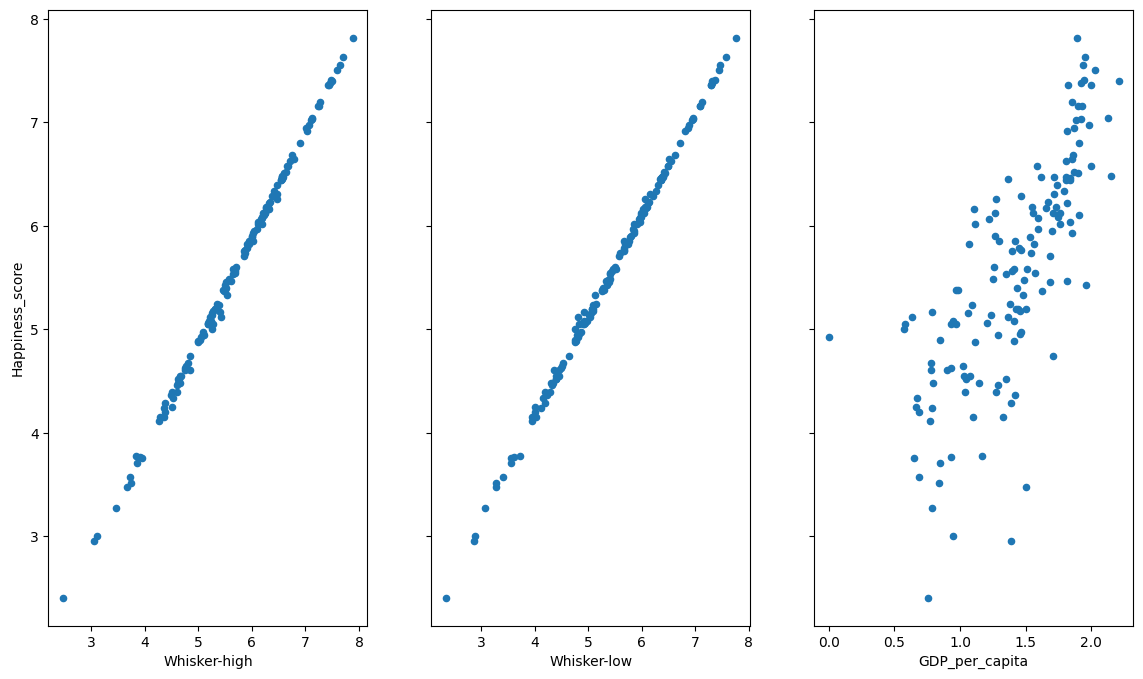

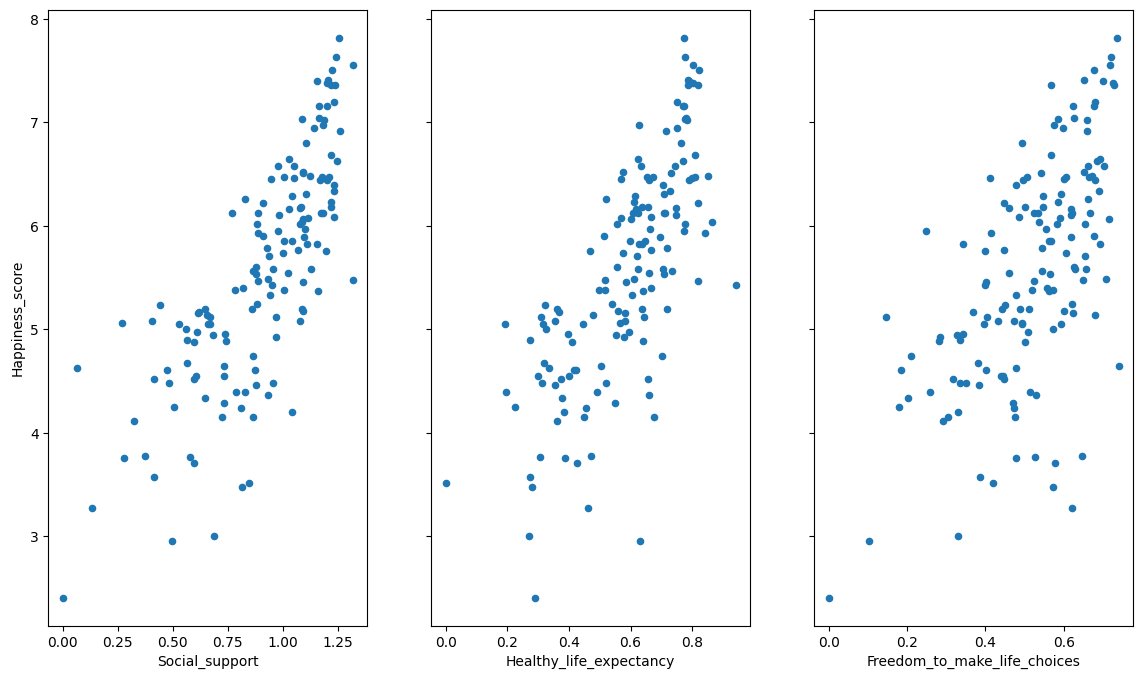

In [31]:
# to visualize the relationship between the features and the response using scatterplots
col = data.columns[1:]
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x=col[0], y='Happiness_score', ax=axs[0], figsize=(14, 8))
data.plot(kind='scatter', x=col[1], y='Happiness_score', ax=axs[1])
data.plot(kind='scatter', x=col[2], y='Happiness_score', ax=axs[2])
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x=col[3], y='Happiness_score', ax=axs[0],figsize=(14, 8))
data.plot(kind='scatter', x=col[4], y='Happiness_score', ax=axs[1])
data.plot(kind='scatter', x=col[5], y='Happiness_score', ax=axs[2])

**Multiple Linear Regression Model**

***Model 1***

In [32]:
# create X and y
feature_cols = data.columns
print("Columns:",col)
X = data[feature_cols]
y = data['Happiness_score']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m1 = LinearRegression()

m1.fit(X_train, Y_train)
Y_pred = m1.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# print intercept and coefficients
print(m1.intercept_)
print(m1.coef_)

Columns: Index(['Whisker-high', 'Whisker-low', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')
MAE: 1.1102230246251565e-15
MSE: 1.873544649899903e-30
RMSE: 1.368774871883577e-15
4.440892098500626e-15
[ 1.00000000e+00 -8.67329680e-15 -8.92286489e-15 -6.18214962e-18
 -3.67764453e-17 -2.44449964e-17 -3.46707976e-16  5.41900024e-16
  4.61830148e-16]


In [33]:
data.rename(columns = {'Whisker-high':'WhiskerHigh'}, inplace = True)
data.rename(columns = {'Whisker-low':'WhiskerLow'}, inplace = True)

In [34]:
m1 = smf.ols(formula='Happiness_score ~ WhiskerHigh + WhiskerLow + GDP_per_capita + Social_support + Healthy_life_expectancy + Freedom_to_make_life_choices + Generosity + Perceptions_of_corruption',dtype='object', data=data).fit()
m1.conf_int()
m1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['dtype']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.941e+08
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:01:21   Log-Likelihood:                 966.93
No. Observations:                 146   AIC:                            -1916.
Df Residuals:                     137   BIC:                            -1889.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0004      0.000     -1.781      0.077      -0.001    4.81e-05
WhiskerHigh                      0.5003      0.000   1178.202      0.000       0.499       0.501
WhiskerLow                       0.4998      0.000   1156.186      0.000       0.499       0.501
GDP_per_capita                   0.0002      0.000      1.445      0.151   -7.38e-05       0.000
Social_support                  -0.0003      0.000     -2.011      0.046      -0.001   -5.65e-06
Healthy_life_expectancy         -0.0004      0.000     -1.210      0.228      -0.001       0.000
Freedom_to_make_life_choices    -0.0004      0.000     -1.715      0.089      -0.001    6.61e-05
Generosity                       0.0003      0.000      0.815      0.417      -0.000       0.001
Perceptions_of_corruption       -0.0004      0.000     -1.552      0.123      -0.001       0.000
==============================================================================
Omnibus:                        3.948   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                2.366
Skew:                           0.045   Prob(JB):                        0.306
Kurtosis:                       2.383   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
m1.rsquared

0.9999999117582032

In [36]:
m1.pvalues

Intercept                        7.713786e-02
WhiskerHigh                     2.742474e-276
WhiskerLow                      3.633447e-275
GDP_per_capita                   1.506227e-01
Social_support                   4.632315e-02
Healthy_life_expectancy          2.283434e-01
Freedom_to_make_life_choices     8.860431e-02
Generosity                       4.165586e-01
Perceptions_of_corruption        1.229484e-01
dtype: float64

Dropping 'Perceptions_of_corruption' since p value is greater than 0.05


In [37]:
data.drop('Perceptions_of_corruption', axis=1, inplace=True)

***Model 2***

In [38]:
# create X and y
feature_cols = data.columns
print("Columns:",feature_cols)
X = data[feature_cols]
y = data['Happiness_score']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m2 = LinearRegression()

m2.fit(X_train, Y_train)
Y_pred = m2.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# print intercept and coefficients
print(m2.intercept_)
print(m2.coef_)

Columns: Index(['Happiness_score', 'WhiskerHigh', 'WhiskerLow', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity'],
      dtype='object')
MAE: 1.0954200509634878e-15
MSE: 1.5514264469346565e-30
RMSE: 1.2455627029317538e-15
6.217248937900877e-15
[ 1.00000000e+00  4.98382364e-15  4.74138502e-15 -9.57703612e-17
 -1.61678198e-16 -6.05527727e-17 -3.23236490e-16  6.10259570e-16]


In [39]:
m2 = smf.ols(formula='Happiness_score ~ WhiskerHigh + WhiskerLow + GDP_per_capita + Social_support + Healthy_life_expectancy + Freedom_to_make_life_choices + Generosity',dtype='object', data=data).fit()
m2.conf_int()
m2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['dtype']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.196e+08
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:02:42   Log-Likelihood:                 965.66
No. Observations:                 146   AIC:                            -1915.
Df Residuals:                     138   BIC:                            -1891.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0004      0.000     -1.533      0.128      -0.001       0.000
WhiskerHigh                      0.5003      0.000   1172.586      0.000       0.499       0.501
WhiskerLow                       0.4998      0.000   1150.364      0.000       0.499       0.501
GDP_per_capita                   0.0002      0.000      1.235      0.219      -0.000       0.000
Social_support                  -0.0003      0.000     -1.690      0.093      -0.001    4.78e-05
Healthy_life_expectancy         -0.0004      0.000     -1.304      0.194      -0.001       0.000
Freedom_to_make_life_choices    -0.0005      0.000     -2.049      0.042      -0.001   -1.79e-05
Generosity                       0.0002      0.000      0.666      0.507      -0.000       0.001
==============================================================================
Omnibus:                        5.046   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                2.759
Skew:                          -0.054   Prob(JB):                        0.252
Kurtosis:                       2.335   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
m2.pvalues

Intercept                        1.275789e-01
WhiskerHigh                     8.667896e-278
WhiskerLow                      1.214721e-276
GDP_per_capita                   2.190406e-01
Social_support                   9.331287e-02
Healthy_life_expectancy          1.943126e-01
Freedom_to_make_life_choices     4.231258e-02
Generosity                       5.068112e-01
dtype: float64

In [41]:
m2.rsquared

0.9999999102065811

Dropping 'Generosity' since p value is greater than 0.05


In [42]:
data.drop('Generosity', axis=1, inplace=True)

***Model 3***

In [43]:
# create X and y
feature_cols = data.columns
print("Columns:",feature_cols)
X = data[feature_cols]
y = data['Happiness_score']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m3 = LinearRegression()

m3.fit(X_train, Y_train)
Y_pred = m3.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# print intercept and coefficients
print(m3.intercept_)
print(m3.coef_)

Columns: Index(['Happiness_score', 'WhiskerHigh', 'WhiskerLow', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices'],
      dtype='object')
MAE: 3.108624468950438e-16
MSE: 2.5637979419682885e-31
RMSE: 5.063396036227355e-16
8.881784197001252e-16
[ 1.00000000e+00  4.41292104e-15  4.61061521e-15 -1.16129121e-16
 -1.15230674e-16 -1.17167377e-16 -1.33111856e-16]


In [44]:
m3 = smf.ols(formula='Happiness_score ~ WhiskerHigh + WhiskerLow + GDP_per_capita + Social_support + Healthy_life_expectancy + Freedom_to_make_life_choices',dtype='object', data=data).fit()
m3.conf_int()
m3.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['dtype']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.572e+08
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:02:49   Log-Likelihood:                 965.42
No. Observations:                 146   AIC:                            -1917.
Df Residuals:                     139   BIC:                            -1896.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0003      0.000     -1.420      0.158      -0.001       0.000
WhiskerHigh                      0.5003      0.000   1182.467      0.000       0.499       0.501
WhiskerLow                       0.4999      0.000   1163.065      0.000       0.499       0.501
GDP_per_capita                   0.0001      0.000      1.094      0.276      -0.000       0.000
Social_support                  -0.0003      0.000     -1.678      0.096      -0.001    4.96e-05
Healthy_life_expectancy         -0.0004      0.000     -1.354      0.178      -0.001       0.000
Freedom_to_make_life_choices    -0.0005      0.000     -1.972      0.051      -0.001    1.29e-06
==============================================================================
Omnibus:                        6.093   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                3.098
Skew:                          -0.062   Prob(JB):                        0.212
Kurtosis:                       2.297   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
m3.pvalues

Intercept                        1.578784e-01
WhiskerHigh                     4.451520e-280
WhiskerLow                      4.437444e-279
GDP_per_capita                   2.759649e-01
Social_support                   9.560378e-02
Healthy_life_expectancy          1.780288e-01
Freedom_to_make_life_choices     5.060696e-02
dtype: float64

In [46]:
m3.rsquared

0.9999999099183614

Dropping 'GDP_per_capita ' since p value is greater than 0.05


In [47]:
data.drop('GDP_per_capita', axis=1, inplace=True)

***Model 4***

In [51]:
# create X and y
feature_cols = data.columns
print(feature_cols)
X = data[feature_cols]
y = data['Happiness_score']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

m4 = LinearRegression()

m4.fit(X_train, Y_train)
Y_pred = m4.predict(X_test)

print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

# print intercept and coefficients
print(m4.intercept_)
print(m4.coef_)

Index(['Happiness_score', 'WhiskerHigh', 'WhiskerLow', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices'],
      dtype='object')
MAE: 3.552713678800501e-16
MSE: 3.1554436208840474e-31
RMSE: 5.617333549722722e-16
0.0
[ 1.00000000e+00  5.62260345e-15  5.76393471e-15 -6.64896045e-17
 -8.01534895e-17 -1.43729899e-16]


In [52]:
m4 = smf.ols(formula='Happiness_score ~ WhiskerHigh + WhiskerLow +  Social_support + Healthy_life_expectancy + Freedom_to_make_life_choices',dtype='object', data=data).fit()
m4.conf_int()
m4.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['dtype']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.082e+08
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        08:05:03   Log-Likelihood:                 964.80
No. Observations:                 146   AIC:                            -1918.
Df Residuals:                     140   BIC:                            -1900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0003      0.000     -1.264      0.208      -0.001       0.000
WhiskerHigh                      0.5002      0.000   1215.563      0.000       0.499       0.501
WhiskerLow                       0.5000      0.000   1204.295      0.000       0.499       0.501
Social_support                  -0.0002      0.000     -1.466      0.145      -0.001    8.26e-05
Healthy_life_expectancy         -0.0003      0.000     -0.982      0.328      -0.001       0.000
Freedom_to_make_life_choices    -0.0005      0.000     -2.004      0.047      -0.001   -6.68e-06
==============================================================================
Omnibus:                        7.150   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                3.421
Skew:                          -0.072   Prob(JB):                        0.181
Kurtosis:                       2.264   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
m4.pvalues

Intercept                        2.082158e-01
WhiskerHigh                     1.532370e-283
WhiskerLow                      5.643359e-283
Social_support                   1.449560e-01
Healthy_life_expectancy          3.279818e-01
Freedom_to_make_life_choices     4.696136e-02
dtype: float64

In [54]:
m4.rsquared

0.9999999091431105